In [2]:
# 16110011 Amit Kumar Singh Yadav| NLP Assignment 01 -  part-(a)

import numpy as np
from bs4 import BeautifulSoup as bsoup
import pandas as pd
import re
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

document= pd.read_csv('tweets-dataset.csv')
#on analysing the document i.e. tweet-data, found many sentence with @, #, "" etc. Hence, first removed them

#function to clean tweet data 
def tweet_cleaner(tweet_text):
    #first remove all links i.e having html
    clean_text = bsoup(tweet_text, 'html').get_text()  
    #now split them 
    words = clean_text.split()
    # now removed words with # and @
    clean_words = [wrd for wrd in words if '@' not in wrd and '#' not in wrd] 
    #rejoined clean words to make clean document
    clean_document = ' '.join(clean_words)
    #now still there can be words with digit like amit_1999 or other special characters
    # so taking only alphabetic words
    final_clean_document = re.sub('[^a-zA-Z]+', ' ', clean_document) 
    #now we just need to normalize document before sending
    final_clean_document_r= final_clean_document.lower()
    return( final_clean_document_r )

clean_vector = np.vectorize(tweet_cleaner)

document['clear_tweet'] = clean_vector(document['Sentence'])
#document[:5] uncomment it to see the new clean data
# made a function to split words from sentence
def tweet_tokenize(s):
    return tuple(s.split())

tokens = []
for i in range(len(document)):
    tokens.extend( tweet_tokenize( document.iloc[i]['clear_tweet']) )

sorted_tokens = sorted(tokens)
word_types = list(set(tokens))
print("Number of word types:", len(word_types))
print("Number of tokens:", len(tokens))
print("Type to Token ratio = ",(len(word_types)/len(tokens)))




C:\Users\hp\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\hp\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


Number of word types: 32710
Number of tokens: 303178
Type to Token ratio =  0.10789041421211301


1b: fl = [ 72.71693364]


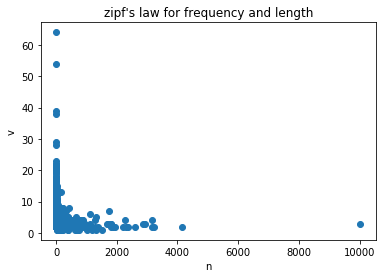

In [101]:
# 16110011 Amit Kumar Singh Yadav| NLP Assignment 01 -  part-(b) Zipf's law

#define zipf's law
def zipf_law(length, freq): 
    return freq/length

no_of_token = {}
for s in sorted_tokens:
    if s in no_of_token:
        no_of_token[s] += 1
    else:
        no_of_token[s] = 1

sorted_no_of_token = list(no_of_token.items())
sorted_no_of_token.sort(key=lambda x:x[1], reverse=True)

length = [len(item[0]) for item in sorted_no_of_token]
frequency = [item[1] for item in sorted_no_of_token]


parameter, param_cov = curve_fit(zipf_law, length, frequency)
print ("1b: fl = "+str(parameter))
plt.scatter(frequency,length);
plt.title("zipf's law for frequency and length")
plt.xlabel("n")
plt.ylabel("v")
plt.show();

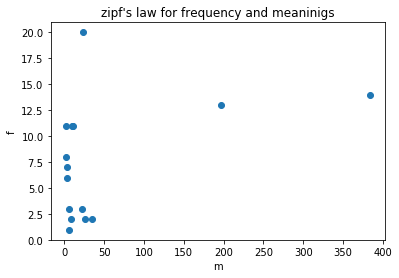

1b: m = 4.78 * f^0.164876021483


In [103]:

from nltk.corpus import wordnet
#define zipf's law
def zipf_law_mean(freq, k, power): 
    return k*(freq**power)
selected_list=[sorted_no_of_token[1401],sorted_no_of_token[100],sorted_no_of_token[3000],sorted_no_of_token[3200],sorted_no_of_token[5100],sorted_no_of_token[5000],sorted_no_of_token[8901],sorted_no_of_token[1045],sorted_no_of_token[200],sorted_no_of_token[12709],sorted_no_of_token[13000],sorted_no_of_token[3400],sorted_no_of_token[1600],sorted_no_of_token[1500],sorted_no_of_token[7100]]
frequencies=[]
meanings=[]
for i in selected_list:
    frequencies.append(no_of_token[i[0]])
    synonyms = []  
    for synonym in wordnet.synsets(i[0]): 
        for lemma in synonym.lemmas(): 
            synonyms.append(lemma.name())
    meanings.append(len(set(synonyms)))


parameter, param_cov = curve_fit(zipf_law_mean, frequencies, meanings)    

plt.scatter (frequencies,meanings)
plt.title("zipf's law for frequency and meaninigs")
plt.xlabel("m")
plt.ylabel("f")
plt.show();
print("1b: m = 4.78 * f^"+str(parameter[1]))

#meanings uncomment- to ensure that wordnet has atleast a meaning for that word. index taken accordingly


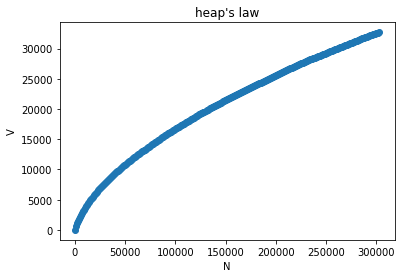

1(c): beta = 0.617289191947, K= 13.6343570238


In [12]:
# 16110011 Amit Kumar Singh Yadav| NLP Assignment 01 -  part-(c) Heap's law
#define the heap's law to be tested
def heap_law(corpus, K, beta): 
    return (corpus**beta)*K

tweet_corpus=[j for j in range(0,303178,1000)]
vocabulary=[len(set(tokens[0:j])) for j in tweet_corpus]
parameter, parameter_cov = curve_fit(heap_law, tweet_corpus, vocabulary) 

plt.scatter(tweet_corpus,vocabulary)
plt.title("heap's law")
plt.ylabel("V")
plt.xlabel("N")
plt.show()

print("1(c): beta = "+str(parameter[1])+", K= "+str(parameter[0]))